In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
def concat_df(train_data,test_data):
    return pd.concat([train_data,test_data],sort=True).reset_index(drop=True)
def divide_df(all_data):
    return all_data.loc[:890],all_data.loc[891:]

In [7]:
train_data=pd.read_csv('train1_agriculture.csv')
test_data=pd.read_csv('test1_agriculture.csv')

df_all=concat_df(train_data,test_data)
dfs=[train_data,test_data]

In [8]:
print('Train data contains:' + str(len(train_data)) + 'rows and' + str(len(train_data.columns)) + 'columns')
print('Test data contains:' + str(len(test_data)) + 'rows and' + str(len(test_data.columns)) + 'columns')


Train data contains:4599rows and10columns
Test data contains:1199rows and9columns


In [9]:
print('First 3 rows of the train data:')
display(train_data.head(3))
print('First 3 rows of the test data:')
display(test_data.head(3))

First 3 rows of the train data:


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1


First 3 rows of the test data:


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2


In [10]:
df_all.shape

(5798, 10)

In [11]:
df_all.drop('ID',axis=1,inplace=True)

In [12]:
df_all.head()

,Crop_Damage,Crop_Type,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Quit,Number_Weeks_Used,Pesticide_Use_Category,Season,Soil_Type
0,0.0,1,188,0,0,0.0,1,1,0
1,1.0,1,209,0,0,0.0,1,2,0
2,1.0,1,257,0,0,0.0,1,2,0
3,1.0,1,257,0,0,0.0,1,2,1
4,1.0,1,342,0,0,0.0,1,2,0


In [13]:
df_all.isnull().sum()

Crop_Damage                1199
Crop_Type                     0
Estimated_Insects_Count       0
Number_Doses_Week             0
Number_Weeks_Quit             0
Number_Weeks_Used           561
Pesticide_Use_Category        0
Season                        0
Soil_Type                     0
dtype: int64

In [14]:
df_all.isnull()

,Crop_Damage,Crop_Type,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Quit,Number_Weeks_Used,Pesticide_Use_Category,Season,Soil_Type
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
5793,True,False,False,False,False,False,False,False,False
5794,True,False,False,False,False,False,False,False,False
5795,True,False,False,False,False,False,False,False,False
5796,True,False,False,False,False,False,False,False,False


In [15]:
df_all.mean()

Crop_Damage                   0.194390
Crop_Type                     0.218524
Estimated_Insects_Count    1347.643153
Number_Doses_Week            26.493618
Number_Weeks_Quit             8.760262
Number_Weeks_Used            28.920374
Pesticide_Use_Category        2.304243
Season                        1.891687
Soil_Type                     0.472232
dtype: float64

In [16]:
df_all=df_all.fillna(df_all.mean())
df_all.isnull().sum()

Crop_Damage                0
Crop_Type                  0
Estimated_Insects_Count    0
Number_Doses_Week          0
Number_Weeks_Quit          0
Number_Weeks_Used          0
Pesticide_Use_Category     0
Season                     0
Soil_Type                  0
dtype: int64

In [17]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5798 entries, 0 to 5797
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Crop_Damage              5798 non-null   float64
 1   Crop_Type                5798 non-null   int64  
 2   Estimated_Insects_Count  5798 non-null   int64  
 3   Number_Doses_Week        5798 non-null   int64  
 4   Number_Weeks_Quit        5798 non-null   int64  
 5   Number_Weeks_Used        5798 non-null   float64
 6   Pesticide_Use_Category   5798 non-null   int64  
 7   Season                   5798 non-null   int64  
 8   Soil_Type                5798 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 407.8 KB


In [18]:
df_all.shape

(5798, 9)

In [19]:
df_all.describe()

,Crop_Damage,Crop_Type,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Quit,Number_Weeks_Used,Pesticide_Use_Category,Season,Soil_Type
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000
mean,0.194390,0.218524,1347.643153,26.493618,8.760262,28.920374,2.304243,1.891687,0.472232
std,0.404864,0.413280,821.330403,15.655508,9.582781,11.999136,0.484594,0.692997,0.499271
min,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,731.000000,15.000000,0.000000,20.000000,2.000000,1.000000,0.000000
50%,0.000000,0.000000,1132.000000,20.000000,6.000000,28.920374,2.000000,2.000000,0.000000
75%,0.194390,0.000000,1786.000000,40.000000,15.000000,36.000000,3.000000,2.000000,1.000000
max,2.000000,1.000000,4097.000000,95.000000,47.000000,66.000000,3.000000,3.000000,1.000000


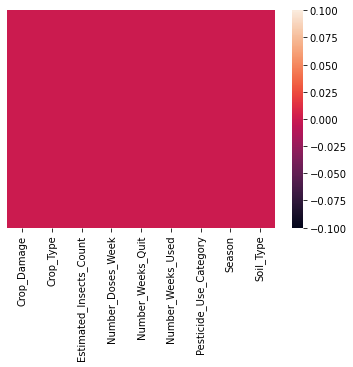

In [20]:
sns.heatmap(df_all.isnull(),yticklabels=False)

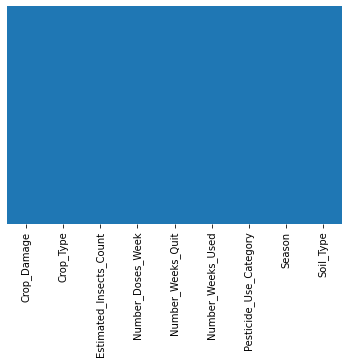

In [21]:
sns.heatmap(df_all.isnull(),yticklabels=False,cbar=False,cmap='tab20')
plt.show()

In [22]:
df_all.skew()

Crop_Damage                2.590079
Crop_Type                  1.362628
Estimated_Insects_Count    0.948378
Number_Doses_Week          0.929452
Number_Weeks_Quit          0.972163
Number_Weeks_Used          0.266335
Pesticide_Use_Category     0.543183
Season                     0.147252
Soil_Type                  0.111273
dtype: float64

In [23]:
from scipy.stats import skew
skew(df_all['Crop_Damage'].dropna())

2.589408825653828

In [24]:
from scipy import stats
p_value=stats.shapiro(df_all['Crop_Type'].dropna())[1]
if p_value >= 0.05:
    print('null hyp of normality is rejected')
else:
    print('null hyp of normality is accepted')


null hyp of normality is accepted


In [25]:
x=df_all.iloc[:,0:-1]
x.head()

,Crop_Damage,Crop_Type,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Quit,Number_Weeks_Used,Pesticide_Use_Category,Season
0,0.0,1,188,0,0,0.0,1,1
1,1.0,1,209,0,0,0.0,1,2
2,1.0,1,257,0,0,0.0,1,2
3,1.0,1,257,0,0,0.0,1,2
4,1.0,1,342,0,0,0.0,1,2


In [26]:
y=df_all.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Soil_Type, dtype: int64

In [27]:
x.shape

(5798, 8)

In [28]:
y.shape

(5798,)

In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [30]:
x_train.shape

(3884, 8)

In [31]:
y_train.shape

(3884,)

In [32]:
x_test.shape

(1914, 8)

In [33]:
y_test.shape

(1914,)

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [35]:
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
lr.coef_

array([-4.98869238e-02, -2.40969732e-01, -6.75806700e-05,  7.41973439e-04,
       -3.43628095e-03, -4.77685582e-03,  1.26936107e-01, -5.21214934e-03])

In [37]:
lr.intercept_

0.4939115882225683

In [38]:
lr.score(x_train,y_train)

0.06967530536174882

In [39]:
df_all.columns

Index(['Crop_Damage', 'Crop_Type', 'Estimated_Insects_Count',
       'Number_Doses_Week', 'Number_Weeks_Quit', 'Number_Weeks_Used',
       'Pesticide_Use_Category', 'Season', 'Soil_Type'],
      dtype='object')

In [40]:
Crop_Damage=lr.predict(x_test)
print('Predicted Crop damage:',Crop_Damage)
print('actual Crop damage',y_test)

Predicted Crop damage: [0.43819923 0.39486746 0.55267063 ... 0.64653604 0.48008305 0.57867251]
actual Crop damage 3734    0
1103    0
812     0
1632    1
1128    0
       ..
2087    1
5532    1
111     0
1170    0
1391    1
Name: Soil_Type, Length: 1914, dtype: int64


In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,Crop_Damage))

print('Mean squared error:',mean_squared_error(y_test,Crop_Damage))


error:
Mean absolute error: 0.4612162467556985
Mean squared error: 0.22994707830205255


In [42]:
from sklearn.metrics import r2_score
print(r2_score(y_test,Crop_Damage))

0.07682076213480071


In [43]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean()

-0.25387641848998177

In [44]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [45]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('r2_score:',r2_score(y_test,predm))
    print('***************************************************************')
    print('\n')

Score of LinearRegression() is: 0.06967530536174882
Error:
Mean absolute error: 0.4612162467556985
Mean squared error: 0.22994707830205255
r2_score: 0.07682076213480071
***************************************************************


Score of DecisionTreeRegressor() is: 0.9963853002920956
Error:
Mean absolute error: 0.4336468129571578
Mean squared error: 0.4336468129571578
r2_score: -0.7409820435404424
***************************************************************


Score of KNeighborsRegressor() is: 0.24471365989010185
Error:
Mean absolute error: 0.4737722048066875
Mean squared error: 0.28572622779519335
r2_score: -0.14711838550770762
***************************************************************


Score of SVR() is: -0.20032220825029756
Error:
Mean absolute error: 0.4365748504031822
Mean squared error: 0.29108758678793883
r2_score: -0.16864288299378982
***************************************************************


Score of Lasso() is: 0.0328938698020913
Error:
Mean absolute err

In [46]:
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[0.001,0.01,0.1,1],'random_state':range(42,100)}
clf=GridSearchCV(ridge,parameters)
clf.fit(x,y)
clf.best_params_

{'alpha': 1, 'random_state': 42}

In [47]:
ridge=Ridge(alpha=1,random_state=42)
ridge.fit(x_train,y_train)
print('Score:',ridge.score(x_train,y_train))
predrd=ridge.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predrd)) 
print('Mean squared error:',mean_squared_error(y_test,predrd))
print('\n')
print('r2_score:',r2_score(y_test,predrd))

Score: 0.06967511417058336


Mean absolute error: 0.4612542033450825
Mean squared error: 0.22994438255686173


r2_score: 0.07683158486848851


In [48]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,random_state=59)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predrf)) 
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('\n')
print('r2_score:',r2_score(y_test,predrf))

Score: 0.8444537748015487


Mean absolute error: 0.4345807210031348
Mean squared error: 0.25200357562695924


r2_score: -0.011730484268234864


In [49]:
from sklearn.ensemble import AdaBoostRegressor
lasso=Lasso()

adb=AdaBoostRegressor(base_estimator=lasso,n_estimators=20,learning_rate=0.1,random_state=59)
adb.fit(x_train,y_train)
print('Score:',adb.score(x_train,y_train))
predadb=adb.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predadb)) 
print('Mean squared error:',mean_squared_error(y_test,predadb))
print('\n')
print('r2_score:',r2_score(y_test,predadb))

Score: 0.03271808370453411


Mean absolute error: 0.4804840670100134
Mean squared error: 0.23851563748845253


r2_score: 0.04242016875603727


In [51]:
import joblib
joblib.dump(DecisionTreeRegressor,'train1_agriculture.csv')

['train1_agriculture.csv']